In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns  

In [112]:
df = pd.read_csv("ratings_Electronics.csv", names=['user_id','item_id','rating','titmestamp'])

In [113]:
print(df.shape)
#print(df.info)

(7824482, 4)


In [114]:
# Given data set has 7824482 rows of data with columns as userId, productId, ratings and timestamp.

In [115]:
df.head(10)

,user_id,item_id,rating,titmestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [116]:
# The fourth column is timestamp not providing any valuable information. So we can drop it.

In [117]:
df = df.drop('titmestamp', axis=1)

In [118]:
df.shape

(7824482, 3)

In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


In [120]:
# Not much info from rating column.

# Take a subset of the dataset to make it less sparse/ denser. 
#( For example, keep the users only who has given 50 or more number of ratings )

In [121]:
count = df.groupby("user_id", as_index=False).count()
mean = df.groupby("user_id", as_index=False).mean()

dfMerged = pd.merge(df, count, how='right', on=['user_id'])
dfMerged

,user_id,item_id_x,rating_x,item_id_y,rating_y
0,AKM1MP6P0OYPR,0132793040,5.0,2,2
1,AKM1MP6P0OYPR,B005UEB5TQ,5.0,2,2
2,A2CX7LUOHB2NDG,0321732944,5.0,4,4
3,A2CX7LUOHB2NDG,B000W3LJ6Y,5.0,4,4
4,A2CX7LUOHB2NDG,B001EYU79A,5.0,4,4
5,A2CX7LUOHB2NDG,B0089MVZDW,4.0,4,4
6,A2NWSAGRHCP8N5,0439886341,1.0,1,1
7,A2WNBOD3WNDNKT,0439886341,3.0,1,1
8,A1GI0U4ZRJA8WN,0439886341,1.0,1,1
9,A1QGNMC6O1VW39,0511189877,5.0,2,2


In [122]:
dfMerged["item_id"] = dfMerged["item_id_x"]
dfMerged["rating"] = dfMerged["rating_x"]
dfMerged["count_1"] = dfMerged["rating_y"]

dfNew = dfMerged[['user_id','item_id','rating', 'count_1']]

In [123]:
dfNew.head()

,user_id,item_id,rating,count_1
0,AKM1MP6P0OYPR,0132793040,5.0,2
1,AKM1MP6P0OYPR,B005UEB5TQ,5.0,2
2,A2CX7LUOHB2NDG,0321732944,5.0,4
3,A2CX7LUOHB2NDG,B000W3LJ6Y,5.0,4
4,A2CX7LUOHB2NDG,B001EYU79A,5.0,4


In [124]:
dfNew['count_1'].unique()

array([  2,   4,   1,  19,   3,   5,   9,  14,  27,   6,  10,   8,  16,
        50,  11,   7, 110,  13,  15,  21,  18,  72, 151,  29,  42,  22,
        12,  30,  47,  38,  28,  20,  58,  17,  43, 163,  26,  34,  45,
        25,  48,  54,  35,  24,  69,  99,  84,  41,  53,  57,  44,  23,
       149,  39,  92,  59, 520,  40, 102,  32,  36,  64,  66, 114,  60,
        83, 266, 139,  33,  31,  37, 127, 144,  95,  73, 162, 220,  71,
        46,  51,  70, 314,  49, 501,  81,  62, 226,  90, 177,  75,  74,
        68, 108, 131,  96,  79,  61, 111, 406, 112, 103, 204, 116, 239,
       227,  67,  87, 137, 431, 167,  56, 130, 189,  55,  98, 308, 109,
       156, 192, 238, 159,  88, 252, 176, 218,  52, 174, 125,  63, 199,
        94, 105, 147,  93,  91, 101, 181, 200, 104, 145, 115, 213,  89,
        77, 498,  65, 198, 292,  78, 282, 153,  76,  86,  80,  97,  82,
       100, 202, 126, 196, 129, 193, 279, 216, 123, 132, 240, 107, 270,
       207, 118, 209, 121, 157, 277, 119, 170, 380, 155, 150,  8

In [125]:
dfNew = dfNew.sort_values(by='count_1', ascending=False)
dfCount = dfNew[dfNew.count_1 > 50]
dfCount

,user_id,item_id,rating,count_1
10199,A5JLAU2ARJ0BO,B00068E1ME,1.0,520
9924,A5JLAU2ARJ0BO,B0000659UN,5.0,520
10229,A5JLAU2ARJ0BO,B0007YN3F8,3.0,520
10228,A5JLAU2ARJ0BO,B0007XXU2K,4.0,520
10227,A5JLAU2ARJ0BO,B0007XO7AE,4.0,520
10226,A5JLAU2ARJ0BO,B0007XO79U,4.0,520
10225,A5JLAU2ARJ0BO,B0007WZMW2,5.0,520
10224,A5JLAU2ARJ0BO,B0007UVYO4,5.0,520
10223,A5JLAU2ARJ0BO,B0007UVYLC,5.0,520
10222,A5JLAU2ARJ0BO,B0007TZNA6,2.0,520


In [126]:
# Now we have the users only who has given 50 or more number of ratings

In [127]:
dfCount.shape

(122171, 4)

In [128]:
# We can drop the count_1 column as we are not using it further.
new_dfCount = dfCount.drop('count_1', axis=1)

In [129]:
# Due to memory error we are taking only 90000 users data.

In [219]:
new_dfCount = new_dfCount.head(90000)

In [297]:
ratings_mean_user_count = pd.DataFrame(new_dfCount.groupby('user_id')['rating'].mean()) 
ratings_mean_user_count['rating'] = pd.DataFrame(new_dfCount.groupby('user_id')['rating'].count())

<Figure size 576x432 with 0 Axes>

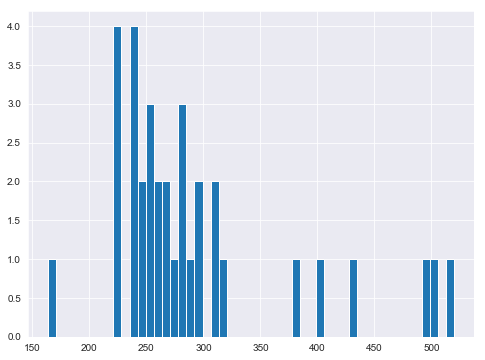

In [298]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_user_count['rating'].hist(bins=50) 

In [ ]:
# 

In [299]:
ratings_mean_item_count = pd.DataFrame(new_dfCount.groupby('item_id')['rating'].mean()) 
ratings_mean_item_count['rating'] = pd.DataFrame(new_dfCount.groupby('item_id')['rating'].count())

<Figure size 576x432 with 0 Axes>

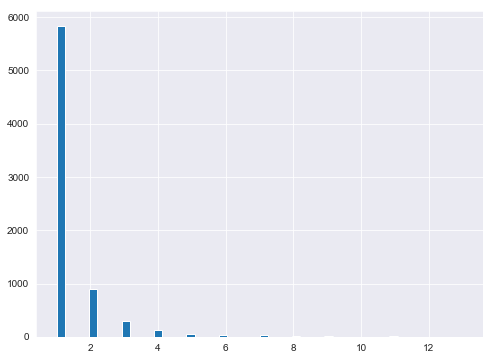

In [300]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_item_count['rating'].hist(bins=50)  

In [220]:
# Split data to train and test
from sklearn.model_selection import train_test_split
import Recommenders as Recommenders

In [221]:
train_data, test_data = train_test_split(new_dfCount, test_size = 0.30, random_state=0)
train_data.head()

,user_id,item_id,rating
1221878,A1UQBFCERIP7VJ,B0096239G0,4.0
151945,A31N0XY2UTB25C,B0002WYJSU,5.0
304448,ARBKYIVNYWK3C,B001GS8G24,5.0
10289,A5JLAU2ARJ0BO,B000LXVM7G,2.0
177851,A2NOW4U7W3F7RI,B007P4VOWC,4.0


In [222]:
# Splited data into train and test dataset in 70/30 ratio.

# Build Popularity Recommender model.

In [223]:
users = new_dfCount['user_id'].unique()

In [224]:
len(users)

34

In [225]:
# So in 90000 users data we have 34 unique users.

In [226]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'item_id')

In [227]:
# Create an instance of popularity based recommender class
pm = Recommenders.popularity_recommender_py()
# pm.create() calculates co-occurance matrix for userid and song
pm.create(train_data, 'user_id', 'item_id')

In [228]:
user_id = users[14]
pm.recommend(user_id)

,user_id,item_id,score,Rank
3677,A3LGT6UZL99IW1,B0053R0WWG,10,1.0
5151,A3LGT6UZL99IW1,B00G4UQ6U8,10,2.0
4160,A3LGT6UZL99IW1,B007OY5V68,9,3.0
4225,A3LGT6UZL99IW1,B0082E9K7U,9,4.0
5250,A3LGT6UZL99IW1,B00HFFDDLG,9,5.0
3182,A3LGT6UZL99IW1,B003XE3X8Q,8,6.0
4219,A3LGT6UZL99IW1,B00829THK0,8,7.0
4756,A3LGT6UZL99IW1,B00BUACE8K,8,8.0
4837,A3LGT6UZL99IW1,B00CMJZAOI,8,9.0
1883,A3LGT6UZL99IW1,B0015DYMVO,7,10.0


In [229]:
# Here, for user 'A3LGT6UZL99IW1' we have recomnded 10 popular items.

In [230]:
user_id = users[33]
pm.recommend(user_id)

,user_id,item_id,score,Rank
3677,A250AXLRBVYKB4,B0053R0WWG,10,1.0
5151,A250AXLRBVYKB4,B00G4UQ6U8,10,2.0
4160,A250AXLRBVYKB4,B007OY5V68,9,3.0
4225,A250AXLRBVYKB4,B0082E9K7U,9,4.0
5250,A250AXLRBVYKB4,B00HFFDDLG,9,5.0
3182,A250AXLRBVYKB4,B003XE3X8Q,8,6.0
4219,A250AXLRBVYKB4,B00829THK0,8,7.0
4756,A250AXLRBVYKB4,B00BUACE8K,8,8.0
4837,A250AXLRBVYKB4,B00CMJZAOI,8,9.0
1883,A250AXLRBVYKB4,B0015DYMVO,7,10.0


In [231]:
# SImillarely for user 'A250AXLRBVYKB4' we have recomnded 10 popular items.

# Build Collaborative Filtering model.

In [232]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [233]:
# Transforming data to surprise format
from surprise import Dataset,Reader

In [234]:
reader = Reader(rating_scale=(1, 5))

In [235]:
data = Dataset.load_from_df(new_dfCount[['user_id', 'item_id', 'rating']], reader)

In [236]:
data

In [237]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30,random_state=123)

In [238]:
type(trainset)

surprise.trainset.Trainset

In [239]:
# user item rating data can be obtained as follows
user_records = trainset.ur
type(user_records)

collections.defaultdict

In [240]:
# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows

print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(1066))

A1ODOGXEYECQQ8
B004ABO7QI


In [241]:
for keys in user_records.keys():
    print(keys)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [242]:
#user_records[0]

In [243]:
print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(1066))

A1ODOGXEYECQQ8
B004ABO7QI


In [244]:
#user_records[0]

In [245]:
from surprise import KNNWithMeans
from surprise import accuracy

In [265]:
algo = KNNWithMeans(k=30, sim_options={'name': 'pearson', 'user_based': False})
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [266]:
len(testset)

3000

In [267]:
testset[0:5]

[('ARBKYIVNYWK3C', 'B004OZ59JY', 5.0),
 ('A3EXWV8FNSSFL6', 'B003M5IQLU', 5.0),
 ('AGVWTYW0ULXHT', 'B00007FWP2', 4.0),
 ('A2XRMQA6PJ5ZJ8', 'B004V4IWHY', 5.0),
 ('A3OXHLG6DIBRW8', 'B000031WDA', 3.0)]

In [268]:
# Evalute on test set
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 0.9875


0.9875381070389182

In [269]:
# The high value of RMSE signifies more error while predicting values compare to actual values. 

In [270]:
# View a particular prediction
test_pred[12]

Prediction(uid='A5JLAU2ARJ0BO', iid='B000083DY0', r_ui=1.0, est=4.357285714285714, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

In [271]:
# convert results to dataframe
test_pred_df = pd.DataFrame(test_pred)
test_pred_df["was_impossible"] = [x["was_impossible"] for x in test_pred_df["details"]]

In [272]:
test_pred_df.loc[test_pred_df.was_impossible].head(5)

,uid,iid,r_ui,est,details,was_impossible
0,ARBKYIVNYWK3C,B004OZ59JY,5.0,4.357286,"{'was_impossible': True, 'reason': 'User and/o...",True
2,AGVWTYW0ULXHT,B00007FWP2,4.0,4.357286,"{'was_impossible': True, 'reason': 'User and/o...",True
3,A2XRMQA6PJ5ZJ8,B004V4IWHY,5.0,4.357286,"{'was_impossible': True, 'reason': 'User and/o...",True
4,A3OXHLG6DIBRW8,B000031WDA,3.0,4.357286,"{'was_impossible': True, 'reason': 'User and/o...",True
5,ARBKYIVNYWK3C,B001MS0OKU,5.0,4.357286,"{'was_impossible': True, 'reason': 'User and/o...",True


# Predictions

In [273]:
# Mkae prediction for a single user
algo.predict(uid="A3CW0ZLUO5X2B1",iid="B00DW374W4")

Prediction(uid='A3CW0ZLUO5X2B1', iid='B00DW374W4', r_ui=None, est=4.666666666666667, details={'actual_k': 0, 'was_impossible': False})

In [274]:
algo.predict(uid="A3CW0ZLUO5X2B1",iid="B0002OIWZE")

Prediction(uid='A3CW0ZLUO5X2B1', iid='B0002OIWZE', r_ui=None, est=4.357285714285714, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

# Generating top 5 recommendations

In [275]:
testset_new = trainset.build_anti_testset()

In [284]:
testset_new.head()

AttributeError: 'list' object has no attribute 'head'

In [276]:
len(testset_new)

177994

In [277]:
testset_new[0:5]

[('A1ODOGXEYECQQ8', 'B0001FV364', 4.357285714285714),
 ('A1ODOGXEYECQQ8', 'B0000BZ2WA', 4.357285714285714),
 ('A1ODOGXEYECQQ8', 'B00006HCCS', 4.357285714285714),
 ('A1ODOGXEYECQQ8', 'B005IMFX2K', 4.357285714285714),
 ('A1ODOGXEYECQQ8', 'B0043VE26U', 4.357285714285714)]

In [278]:
predictions = algo.test(testset_new[0:10000])

In [279]:
predictions_df = pd.DataFrame([[x.uid,x.est] for x in predictions])

In [287]:
#predictions_df.columns = ["userId","iid","est_rating"]
#predictions_df.sort_values(by = ["userId","iid", "est_rating"],ascending=False,inplace=True)
predictions_df.columns = ["userId","iid"]
predictions_df.sort_values(by = ["userId","iid"],ascending=False,inplace=True)

In [288]:
predictions_df.head()

,userId,iid
5168,A5JLAU2ARJ0BO,5.0
5171,A5JLAU2ARJ0BO,5.0
5177,A5JLAU2ARJ0BO,5.0
5179,A5JLAU2ARJ0BO,5.0
5185,A5JLAU2ARJ0BO,5.0


In [289]:
top_5_recos = predictions_df.groupby("userId").head(5).reset_index(drop=True)

In [290]:
top_5_recos

,userId,iid
0,A5JLAU2ARJ0BO,5.0
1,A5JLAU2ARJ0BO,5.0
2,A5JLAU2ARJ0BO,5.0
3,A5JLAU2ARJ0BO,5.0
4,A5JLAU2ARJ0BO,5.0
5,A1ODOGXEYECQQ8,5.0
6,A1ODOGXEYECQQ8,5.0
7,A1ODOGXEYECQQ8,5.0
8,A1ODOGXEYECQQ8,5.0
9,A1ODOGXEYECQQ8,5.0
